<a href="https://colab.research.google.com/github/DavidSalmon13/GenAI/blob/main/HW2/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👀 Multilayer perceptron (MLP)

Name: David Schwartzman
Purpose: Comparing MLP and CNN Architectures on CIFAR-10 Dataset

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
#from notebooks.utils import display

## 0. Parameters <a name="parameters"></a>

In [ ]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0



In [ ]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


## 2. Build the model <a name="build"></a>

In [ ]:
# Creating the MLP model
def create_mlp_model(input_shape):
  model = models.Sequential([
# Flatten the imput
    layers.Flatten(input_shape=(32, 32, 3)),
# Pass the flatten data in to the dense layers using relu activation
    layers.Dense(200, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    # Dropout layer to prevernt an overfitting model
    layers.Dropout(rate = 0.35),
    layers.Dense(10, activation = 'softmax'),

])
# Create a summary of the model
  model.summary()
  return model

model = create_mlp_model((32, 32, 3))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3. Train the model <a name="train"></a>

In [ ]:
#Use sparse categorical crossentropy as the loss function
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True,validation_split=0.2) # Set validation split to 20%

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.9587 - accuracy: 0.2861 - val_loss: 1.7892 - val_accuracy: 0.3620
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7771 - accuracy: 0.3615 - val_loss: 1.6996 - val_accuracy: 0.3892
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6939 - accuracy: 0.3915 - val_loss: 1.6469 - val_accuracy: 0.4105
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6464 - accuracy: 0.4143 - val_loss: 1.6465 - val_accuracy: 0.4109
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6136 - accuracy: 0.4259 - val_loss: 1.5934 - val_accuracy: 0.4358
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5874 - accuracy: 0.4345 - val_loss: 1.5778 - val_accuracy: 0.4363
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5692 - accuracy: 0.4422 - val_loss: 1.5743 - val_accuracy:

## 4. Evaluation <a name="evaluate"></a>

In [ ]:
# Evaluate our model
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4710 - loss: 1.5196


[1.520288109779358, 0.4722000062465668]

In [ ]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
# Convert class indices from y_test to class labels using the CLASSES mapping
actual_single = CLASSES[y_test.flatten()]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


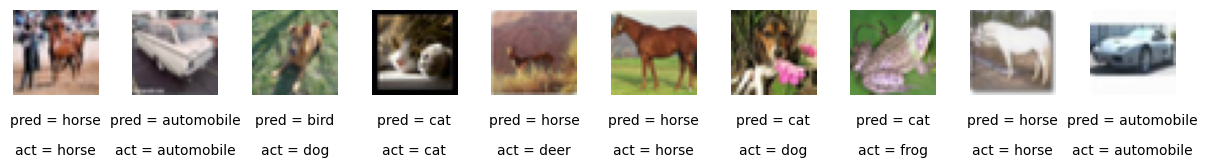

In [ ]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)